# Adoption of the LCA practices and changes in key indicators

             by Tesfaye Woldeyohanes

             
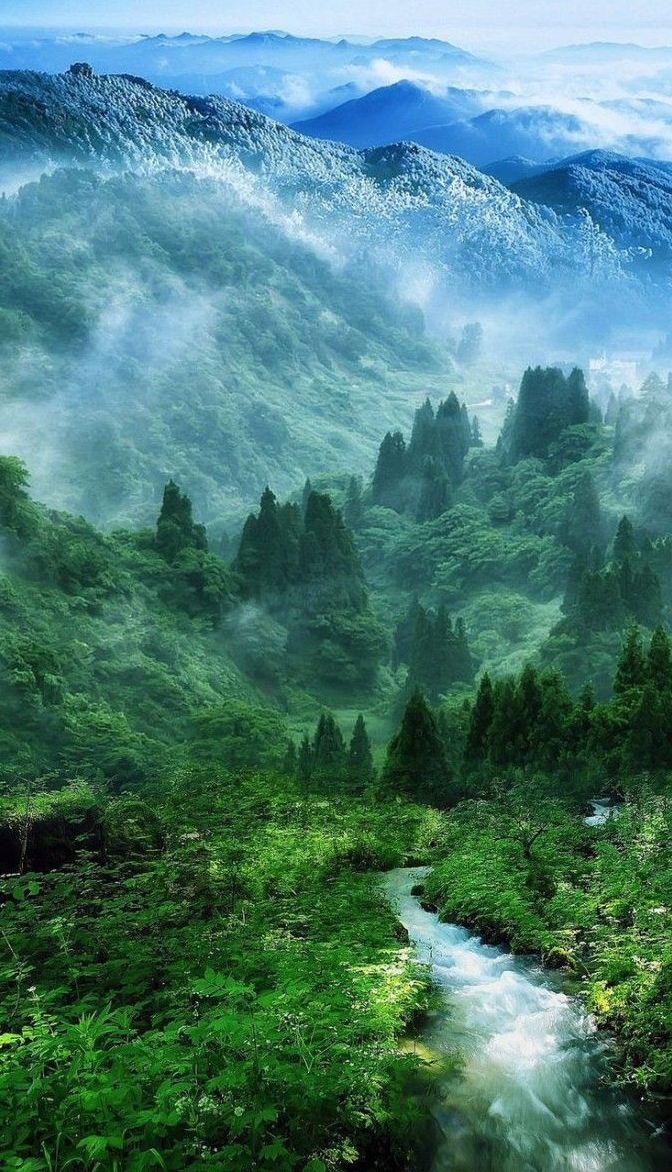

In [1]:
# Data Manuplulations
import pandas as pd
import numpy as np


# visulizations
import matplotlib.pyplot as plt
import seaborn as sns

# visualizations (mapping)
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os
import matplotlib.patheffects as PathEffects
from shapely.geometry import Point


# Deleting Warnings
import warnings
warnings.filterwarnings('ignore')




In [2]:


# Specify the path to your .dta file
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')


# Display the DataFrame
df.head()




ff_code  wave    state         district    block     village gender_res  \
0  11101_10_M  2021  Gujarat  Devbhumi Dwarka  Bhatiya  Bhatavdiya       male   
1  11101_12_M  2021  Gujarat  Devbhumi Dwarka  Bhatiya  Bhatavdiya       male   
2  11101_13_F  2021  Gujarat  Devbhumi Dwarka  Bhatiya  Bhatavdiya     female   
3  11101_14_M  2021  Gujarat  Devbhumi Dwarka  Bhatiya  Bhatavdiya       male   
4  11101_15_F  2021  Gujarat  Devbhumi Dwarka  Bhatiya  Bhatavdiya     female   

   men_hh_n  women_hh_n  hh_size  ...  farmpond_24_el  terracing_23_el  \
0         2           1        4  ...               0                0   
1         3           2        5  ...               0                0   
2         1           1        2  ...               0                0   
3         2           2        5  ...               0                0   
4         1           1        8  ...               0                0   

   shortd_pulses_23_el  shortd_pulses_24_el  seaweed_23_el  seaweed_24_el  \
0                    0                    0              0              0   
1                    0                    0              0              0   
2                    0                    0              0              1   
3                    0                    0              0              0   
4                    0                    0              0              1   

   azolla_23_el  azolla_24_el  mangrove_23_el  mangrove_24_el  
0             0             0               0               0  
1             0             0               0               0  
2             0             0               0               0  
3             0             0               0               0  
4             0             0               0               0  

[5 rows x 1383 columns]

# 1. ASSET INDEX

## BASELINE ASSET INDEX

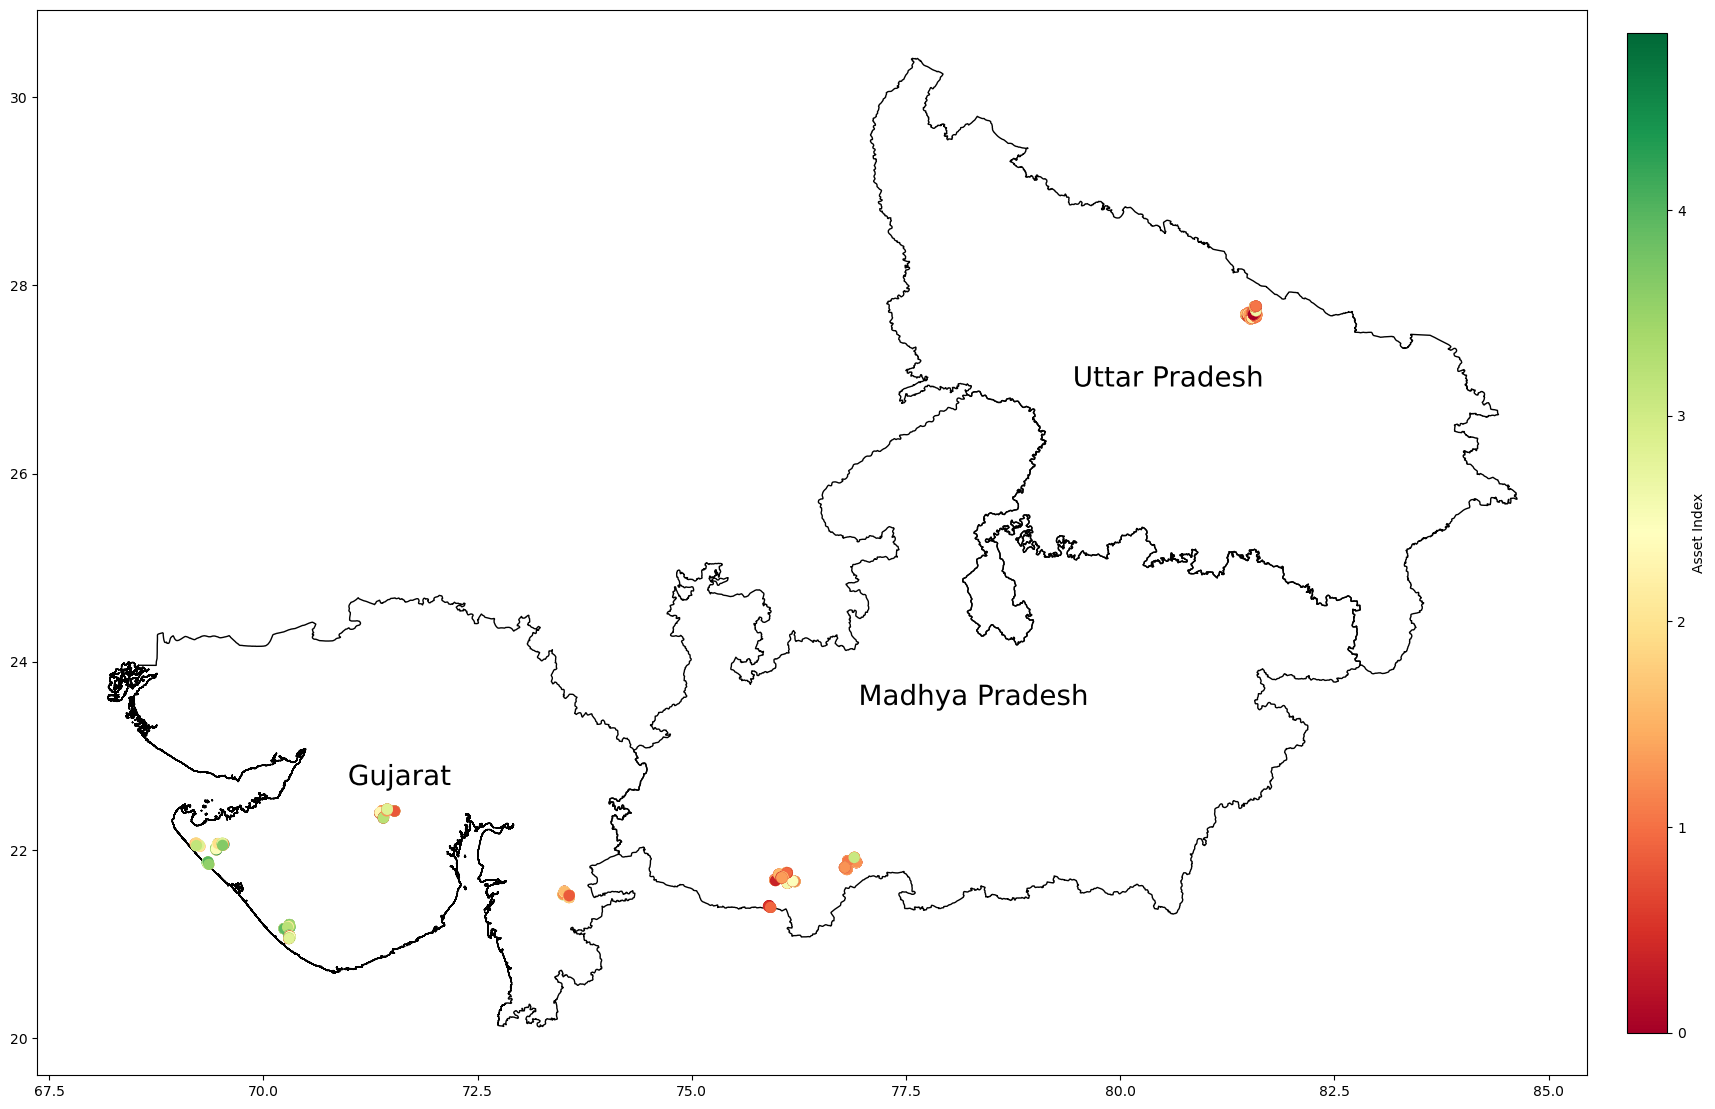

In [3]:


# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='wealth_index', cmap='RdYlGn', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=filtered_geo_df['wealth_index'].min(), vmax=filtered_geo_df['wealth_index'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Asset Index')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=20, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Baseline Asset Index Distribution in Gujarat, Madhya Pradesh, Uttar Pradesh', fontsize=30)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white


# Save the figure
plt.savefig('wealth_index_bl.png')

plt.show()


## ENDLINE WEALTH INDEX

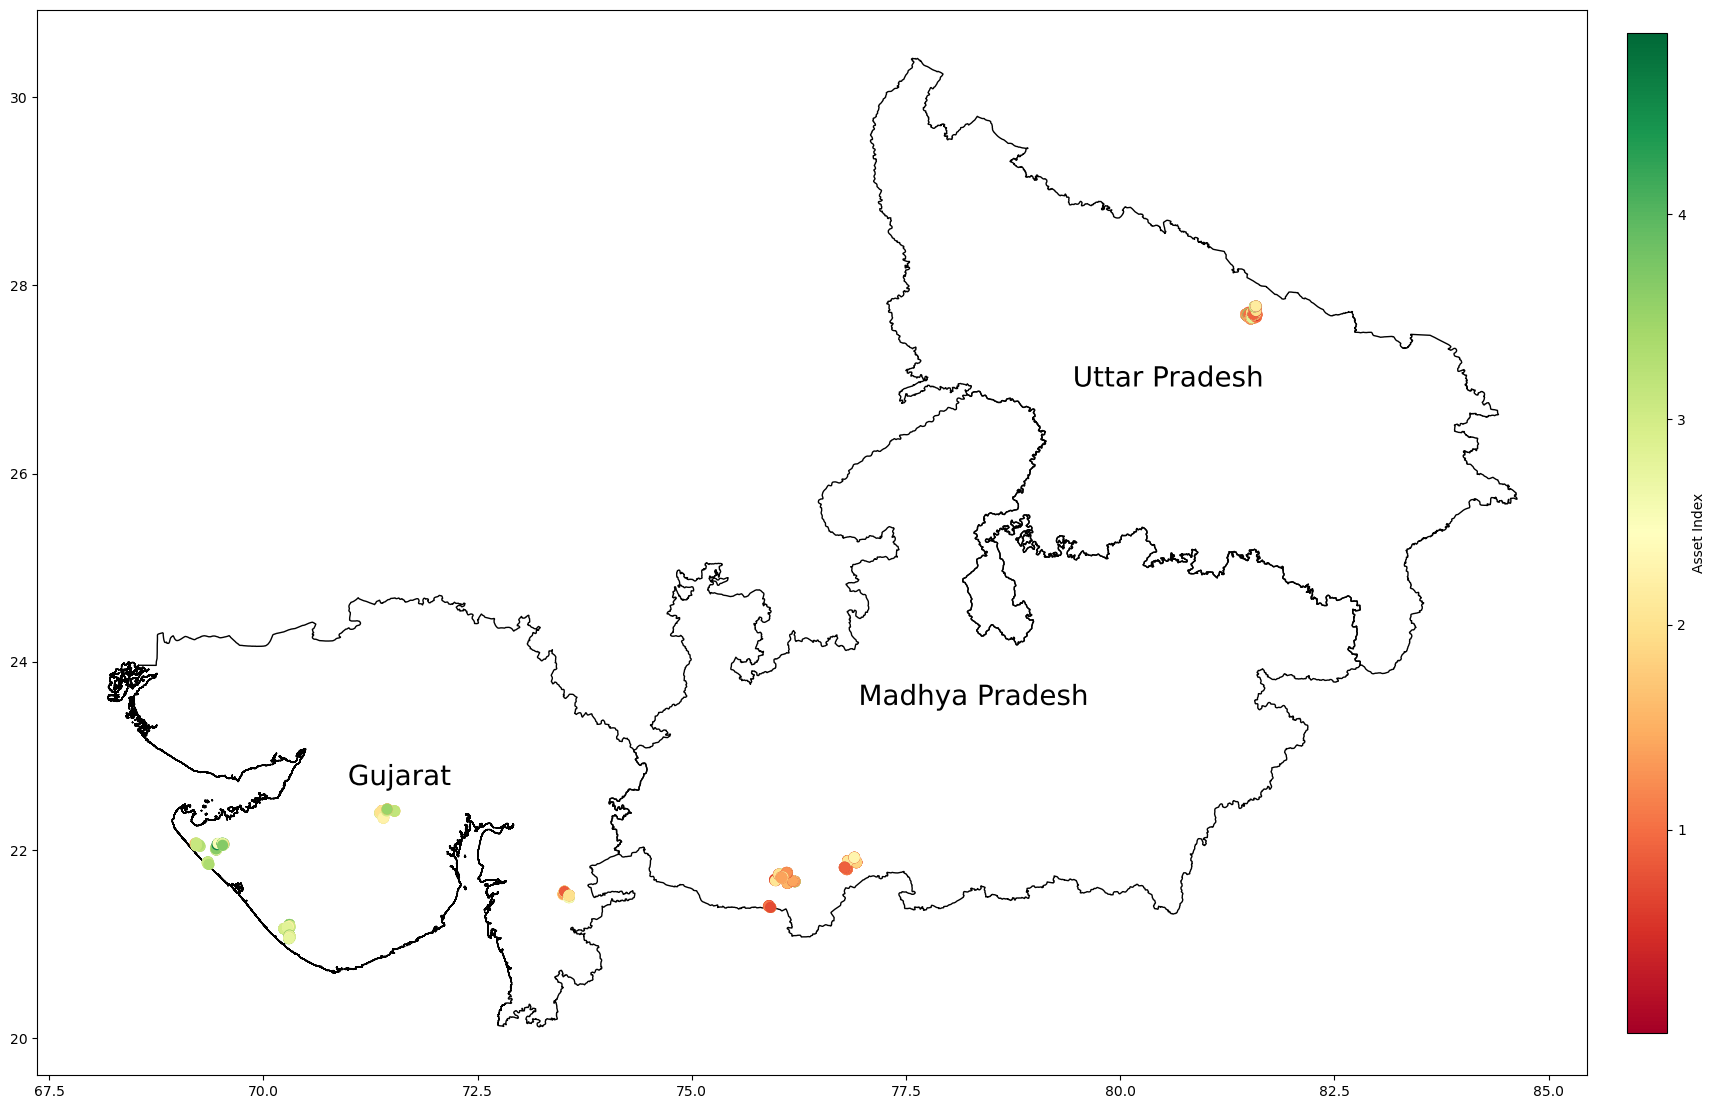

In [4]:


# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='wealth_index_el', cmap='RdYlGn', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=filtered_geo_df['wealth_index_el'].min(), vmax=filtered_geo_df['wealth_index_el'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Asset Index')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=20, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Endline Asset Index Distribution in Gujarat, Madhya Pradesh, Uttar Pradesh', fontsize=30)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white

# Save the figure
plt.savefig('wealth_index_el.png')

plt.show()

In [5]:
wealth_columns = any(col.startswith('wealth') for col in df.columns)
wealth_columns = [col for col in df.columns if col.startswith('wealth')]
print(wealth_columns)


['wealth_index', 'wealth_index_el']


## Asset Index Difference btwn Endline and Baseline

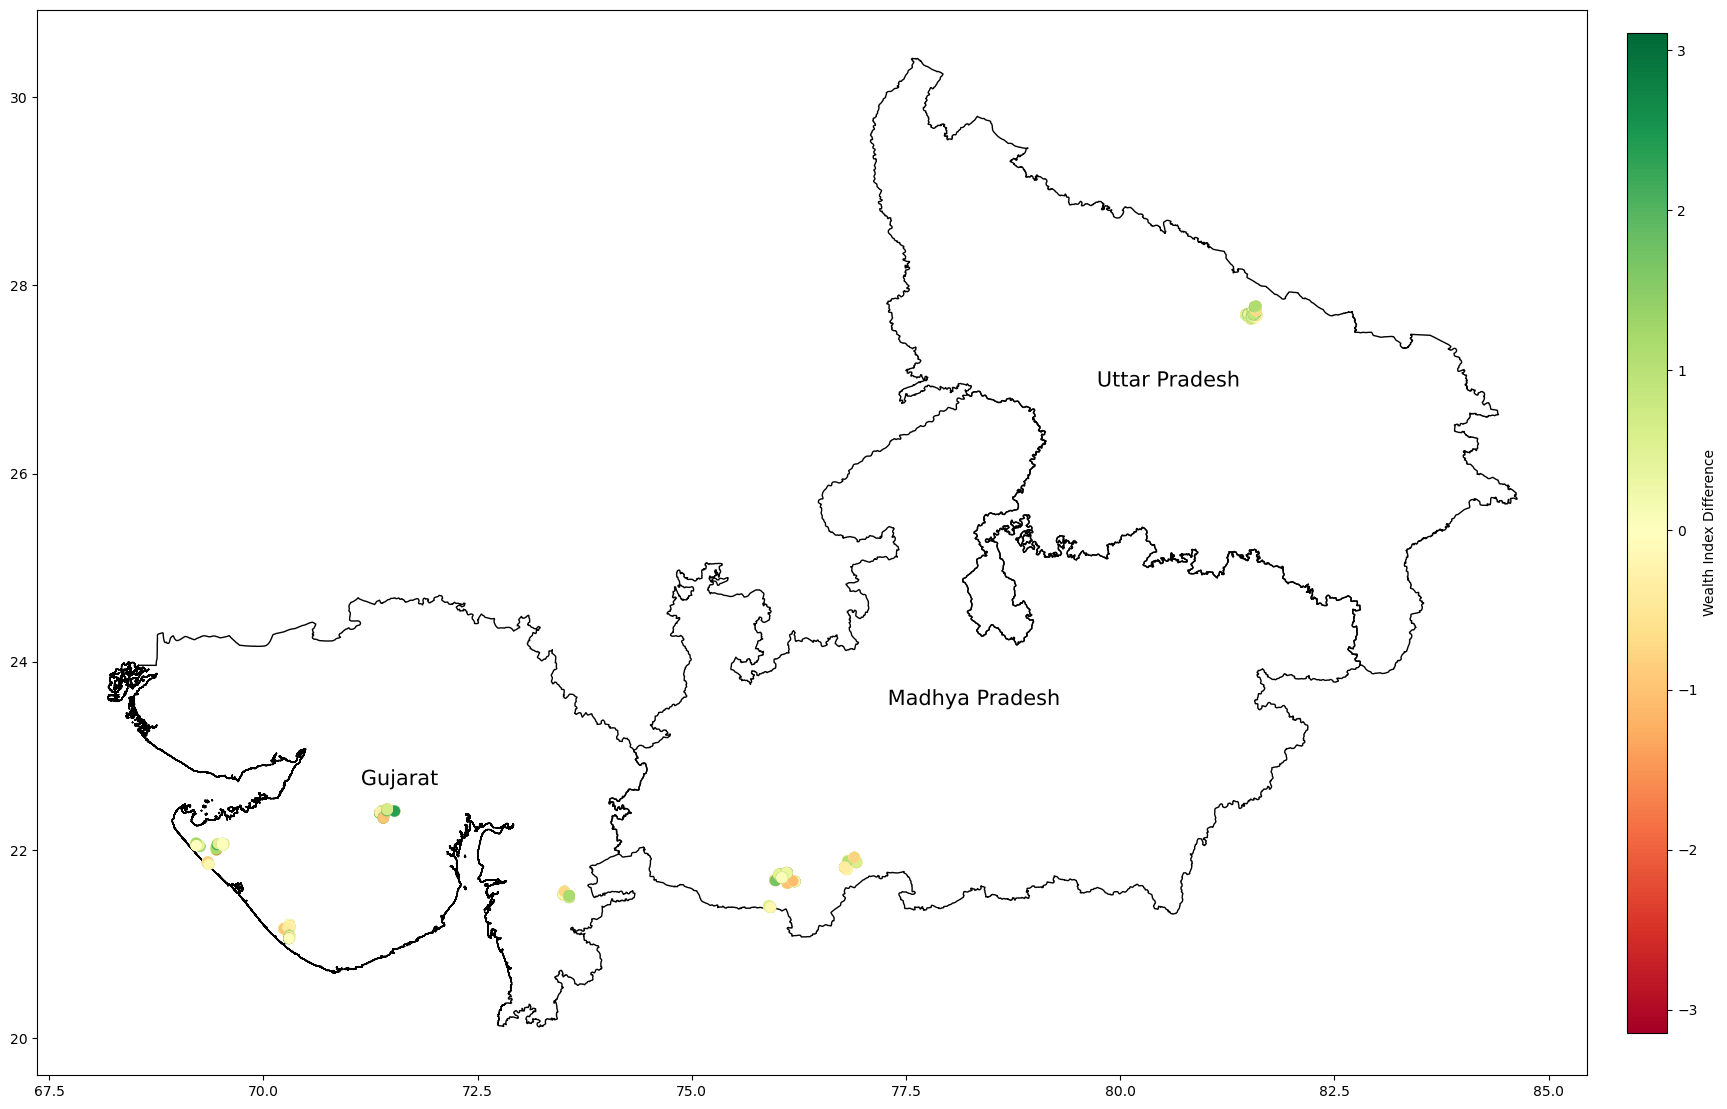

In [6]:

# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Calculate the difference between 'wealth_index_el' and 'wealth_index'
df['wealth_index_diff'] = df['wealth_index_el'] - df['wealth_index']

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index_diff with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='wealth_index_diff', cmap='RdYlGn', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=filtered_geo_df['wealth_index_diff'].min(), vmax=filtered_geo_df['wealth_index_diff'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Wealth Index Difference')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=15, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Wealth Index Difference in Gujarat, Madhya Pradesh, and Uttar Pradesh', fontsize=20)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white

# Save the figure
plt.savefig('wealth_index_diff_el&bl.png')

plt.show()


# DENSITY PLOT FOR THE 3 STATES

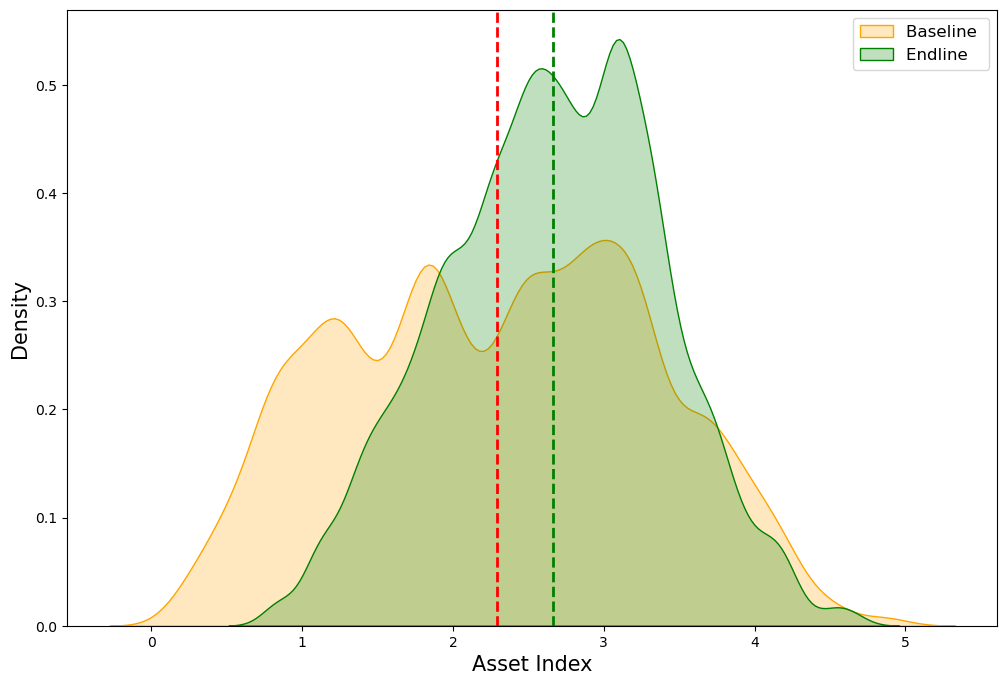

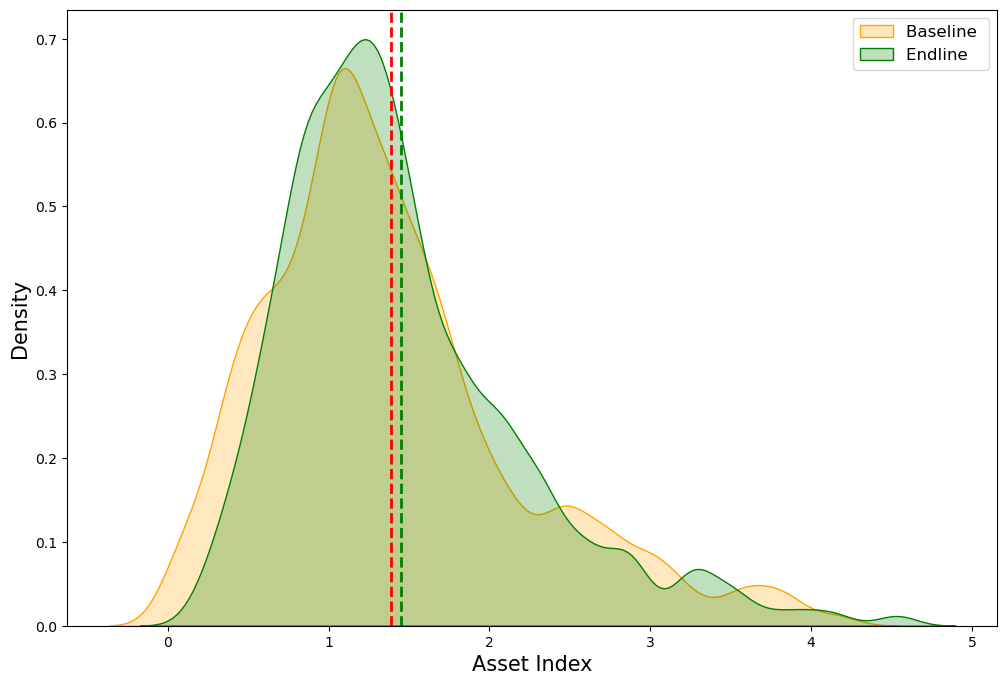

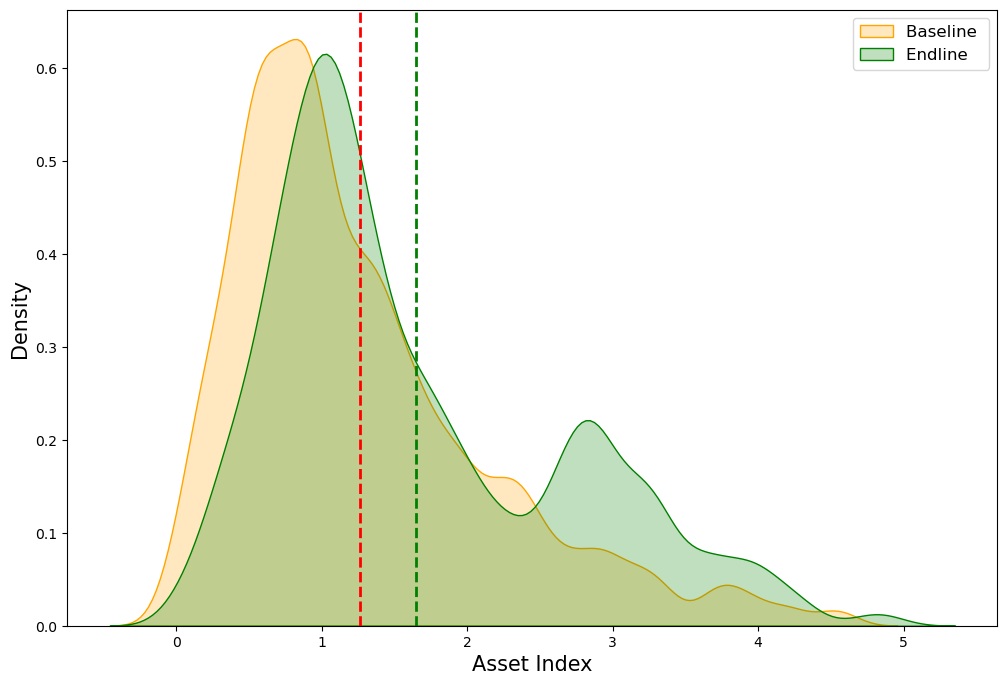

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# List of states to create separate plots
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']

# Create a dictionary to map state names to abbreviations
state_abbr = {
    'Gujarat': 'GJ',
    'Madhya Pradesh': 'MP',
    'Uttar Pradesh': 'UP'
}

for state in states_of_interest:
    state_df = df[df['state'] == state]
    
    # Set up the figure and axes
    plt.figure(figsize=(12, 8), facecolor='white')
    
    # Plot the density for baseline wealth index
    sns.kdeplot(state_df['wealth_index'], shade=True, color='orange', label='Baseline ', bw_adjust=0.5)
    
    # Plot the density for endline wealth index
    sns.kdeplot(state_df['wealth_index_el'], shade=True, color='green', label='Endline ', bw_adjust=0.5)
    
    # Customize the plot
    #plt.title(f'Density Plot of Baseline and Endline Wealth Indices in {state}', fontsize=20)
    plt.xlabel('Asset Index', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.legend(fontsize=12, title_fontsize=15)
    plt.grid(False)  # Remove grid lines
    plt.axvline(state_df['wealth_index'].mean(), color='red', linestyle='dashed', linewidth=2, label='Baseline Mean')
    plt.axvline(state_df['wealth_index_el'].mean(), color='green', linestyle='dashed', linewidth=2, label='Endline Mean')
    
    # Set the background color to white
    plt.gca().set_facecolor('white')
    
    # Save the figure
    plt.savefig(f'wealth_index_{state_abbr[state]}.png')
    
    # Show the plot
    plt.show()


In [8]:
from IPython.display import FileLink

# Display download links for the saved images
display(FileLink('wealth_index_GJ.png'))
display(FileLink('wealth_index_MP.png'))
display(FileLink('wealth_index_UP.png'))


/Users/la/wealth_index_GJ.png

/Users/la/wealth_index_MP.png

/Users/la/wealth_index_UP.png

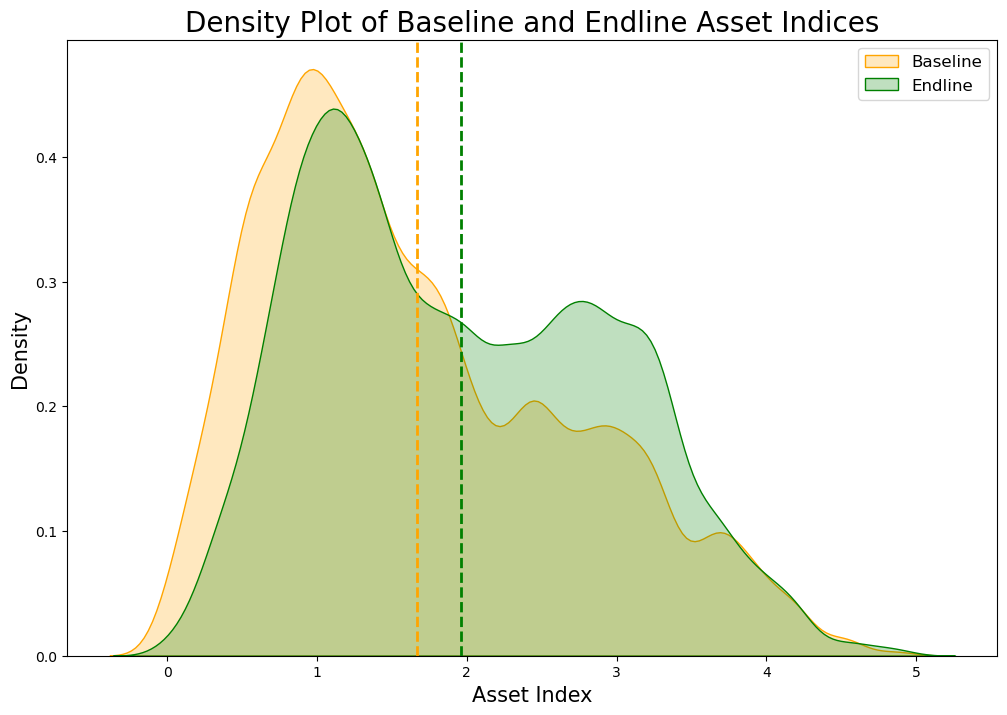

In [9]:
# Set up the figure and axes
plt.figure(figsize=(12, 8), facecolor='white')

# Plot the density for baseline wealth index
sns.kdeplot(df['wealth_index'], shade=True, color='orange', label='Baseline', bw_adjust=0.5)

# Plot the density for endline wealth index
sns.kdeplot(df['wealth_index_el'], shade=True, color='green', label='Endline', bw_adjust=0.5)

# Customize the plot
plt.title('Density Plot of Baseline and Endline Asset Indices', fontsize=20)
plt.xlabel('Asset Index', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend( fontsize=12, title_fontsize=15)
plt.grid(False)  # Remove grid lines
plt.axvline(df['wealth_index'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Baseline Mean')
plt.axvline(df['wealth_index_el'].mean(), color='green', linestyle='dashed', linewidth=2, label='Endline Mean')

# Set the background color to white
plt.gca().set_facecolor('white')

# Save the figure
plt.savefig('wealth_index_com.png')

plt.show()

# 2. FOOD INDEX

In [10]:
fies_columns = any(col.startswith('fies') for col in df.columns)
fies_columns = [col for col in df.columns if col.startswith('fies')]

print(fies_columns)



['fies_raw', 'fies_rm', 'fies_raw_el', 'fies_rm_el']


## BASELINE FOOD INDEX

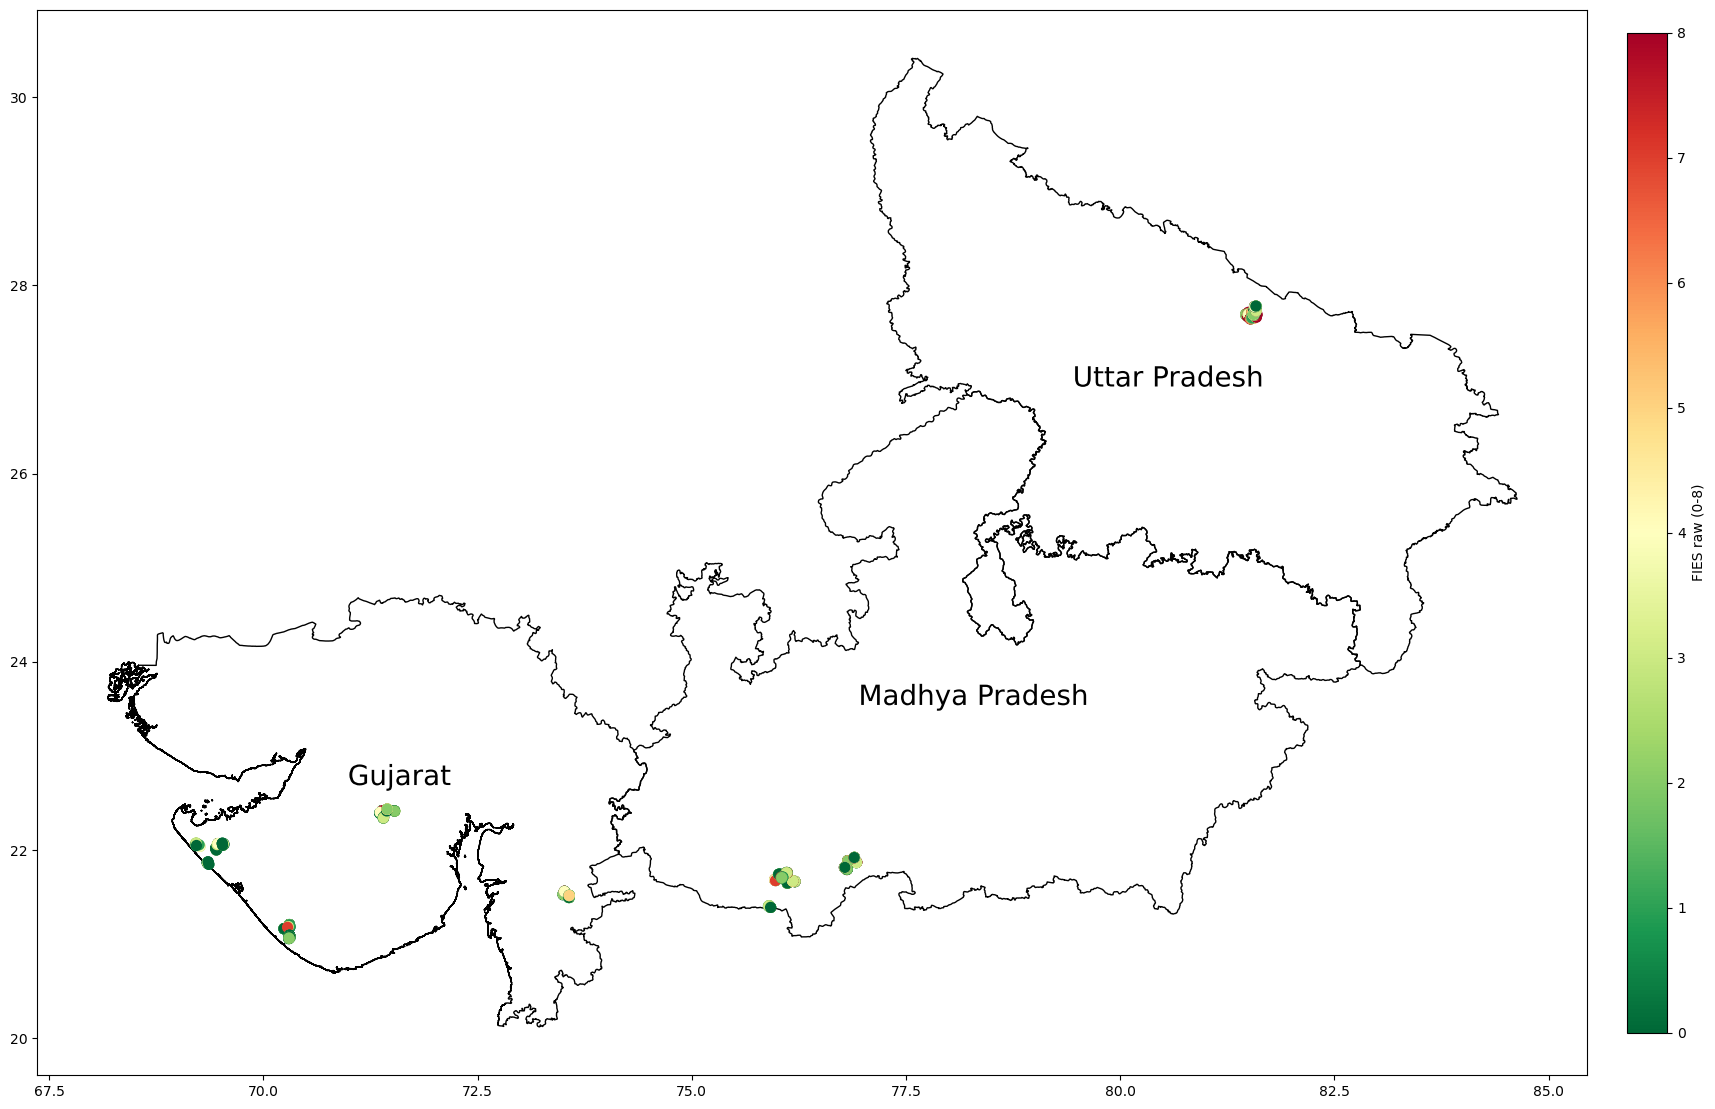

In [11]:


# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='fies_raw', cmap='RdYlGn_r', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=filtered_geo_df['fies_raw'].min(), vmax=filtered_geo_df['fies_raw'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('FIES raw (0-8)')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=20, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Baseline Food Index Distribution in Gujarat, Madhya Pradesh, Uttar Pradesh', fontsize=30)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white

# Save the figure
plt.savefig('Food_index_bl.png')

plt.show()


## ENDLINE FOOD INDEX

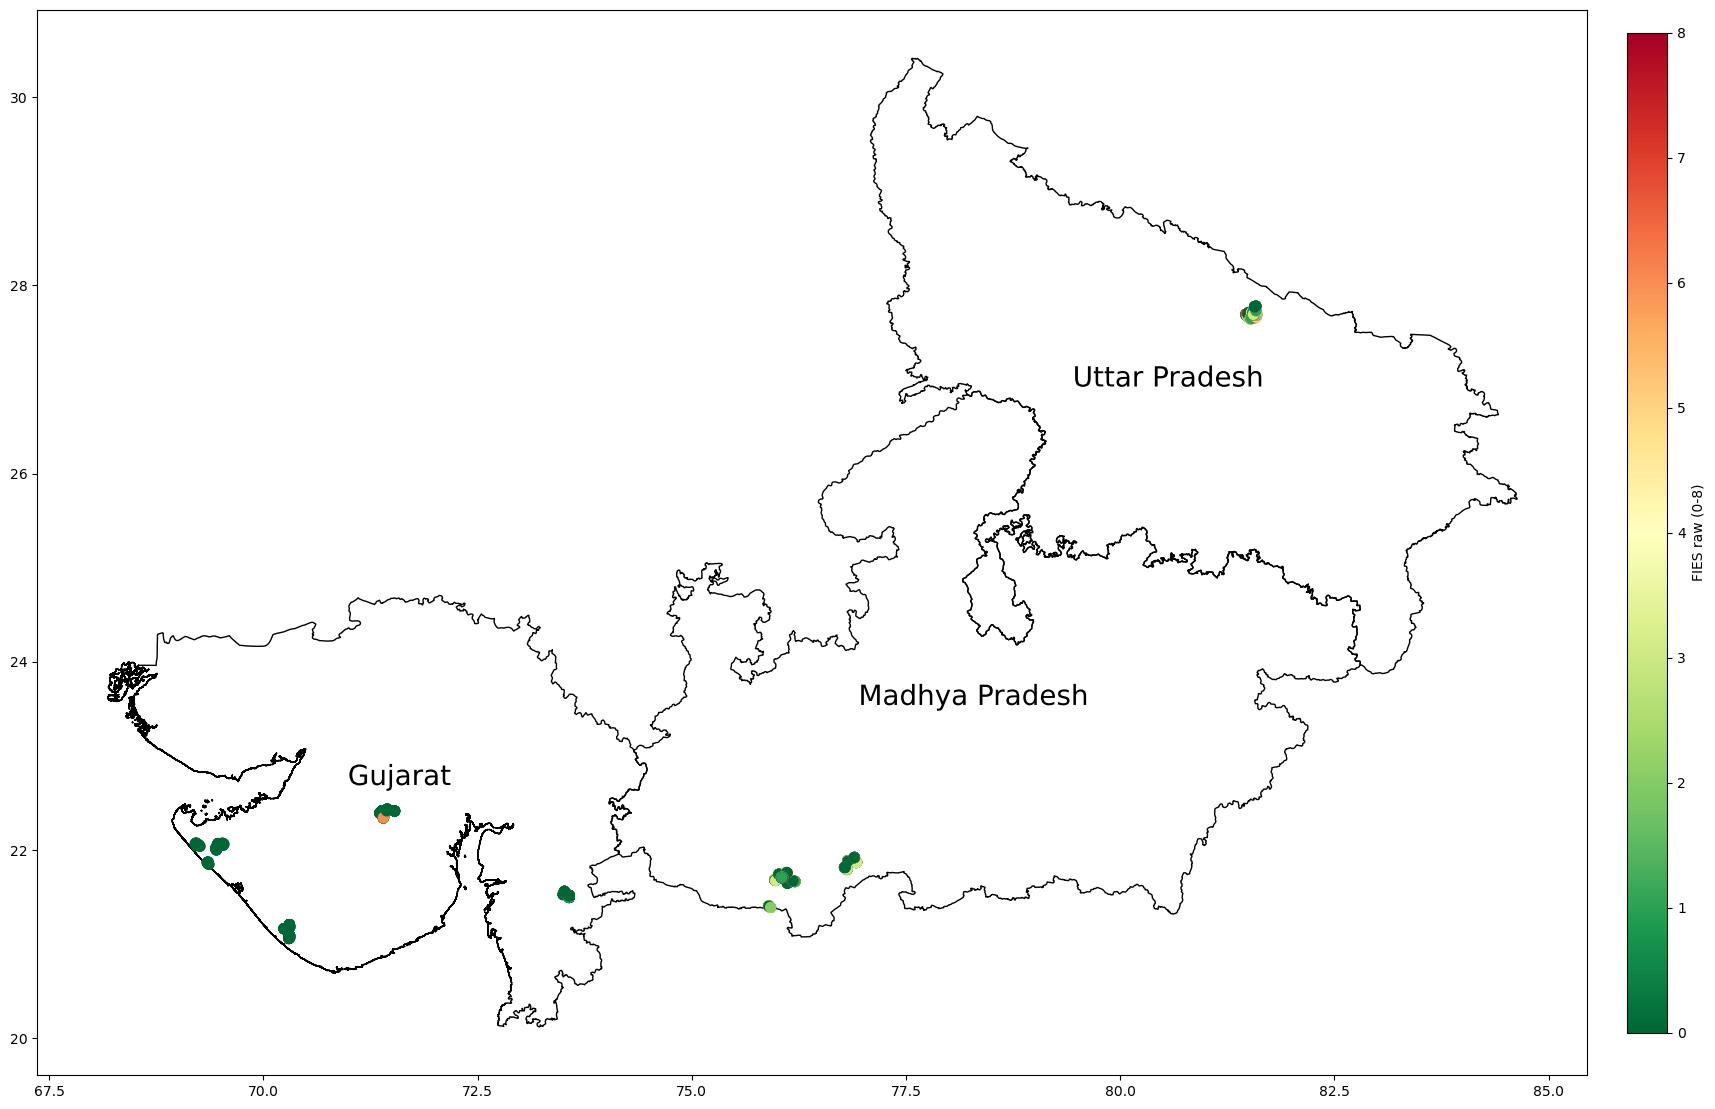

In [12]:


# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='fies_raw_el', cmap='RdYlGn_r', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=filtered_geo_df['fies_raw_el'].min(), vmax=filtered_geo_df['fies_raw_el'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('FIES raw (0-8)')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=20, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Endline Food Index Distribution in Gujarat, Madhya Pradesh, Uttar Pradesh', fontsize=30)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white

plt.savefig('Food_index_el.png')

plt.show()


## Food Index Difference btwn Endline and Baseline

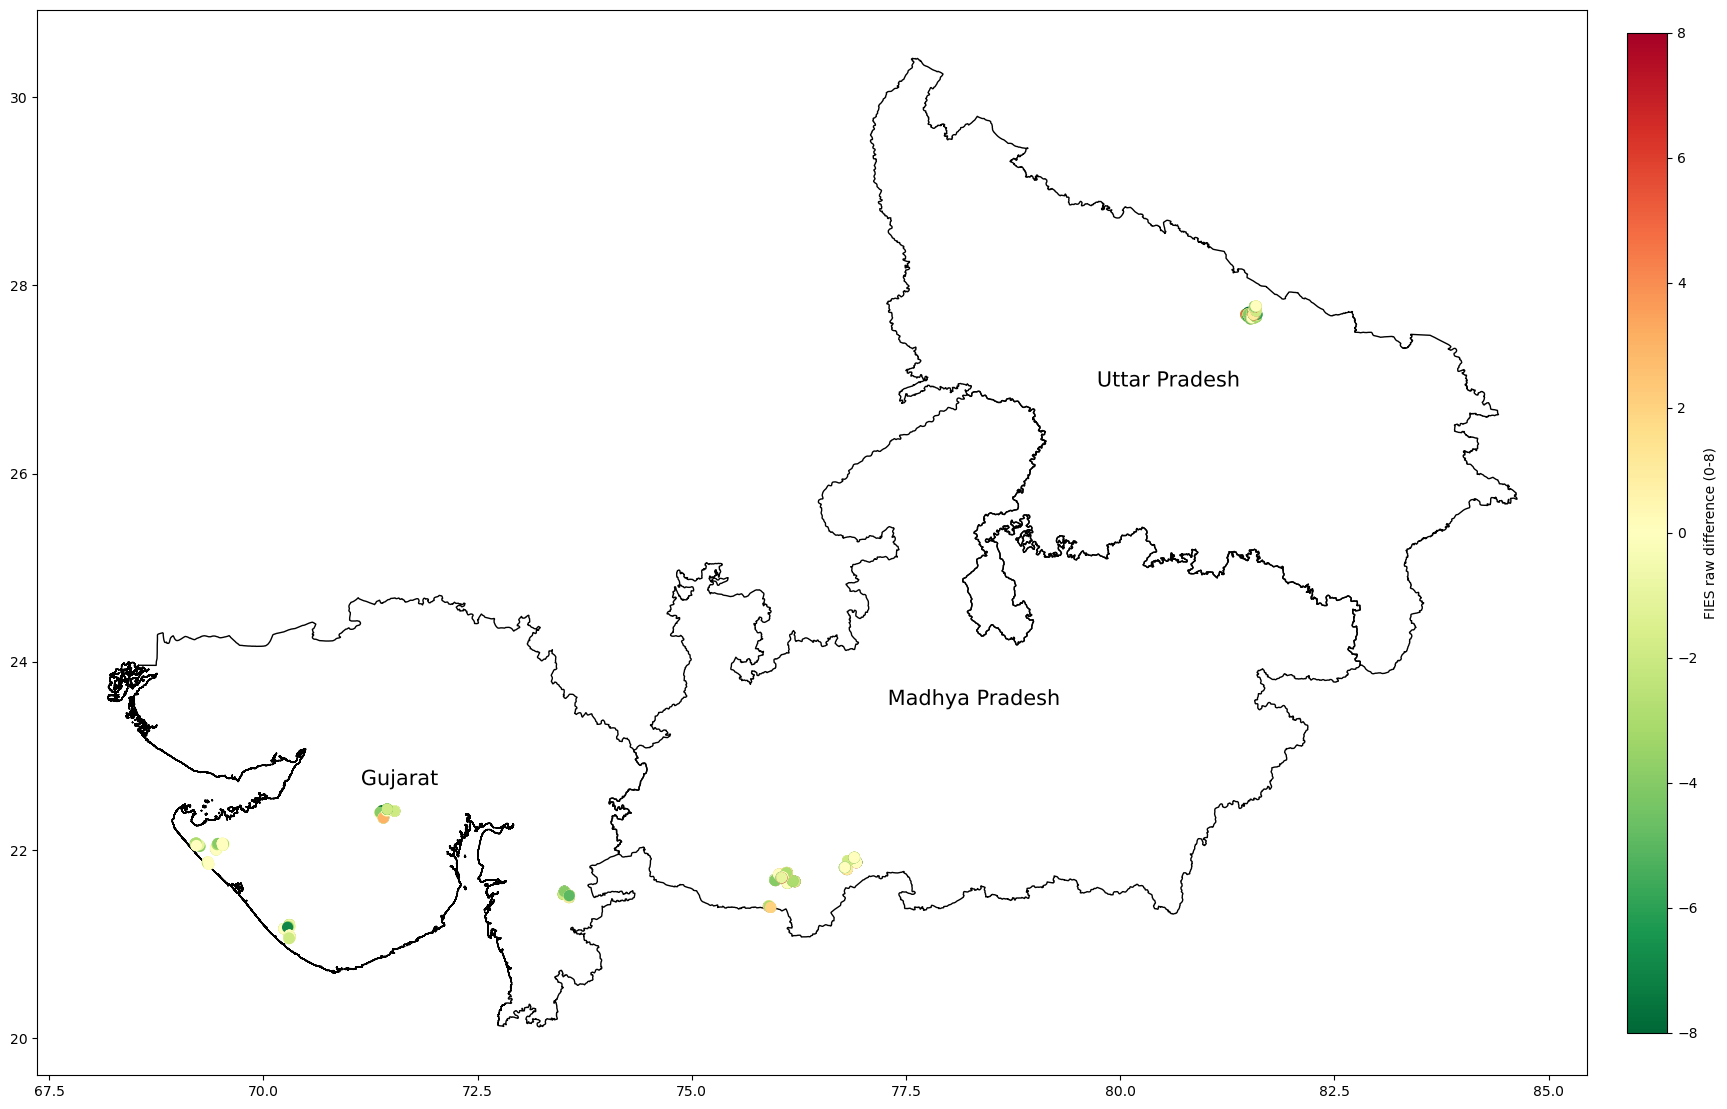

In [13]:

# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Calculate the difference between 'wealth_index_el' and 'wealth_index'
df['fies_raw_index_diff'] = df['fies_raw_el'] - df['fies_raw']

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index_diff with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='fies_raw_index_diff', cmap='RdYlGn_r', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=filtered_geo_df['fies_raw_index_diff'].min(), vmax=filtered_geo_df['fies_raw_index_diff'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('FIES raw difference (0-8)')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=15, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Food Index Difference in Gujarat, Madhya Pradesh, and Uttar Pradesh', fontsize=20)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white

plt.savefig('Food_index_diff_el-bl.png')

plt.show()


## FOOD DENSITY PLOT FOR THE 3 STATES

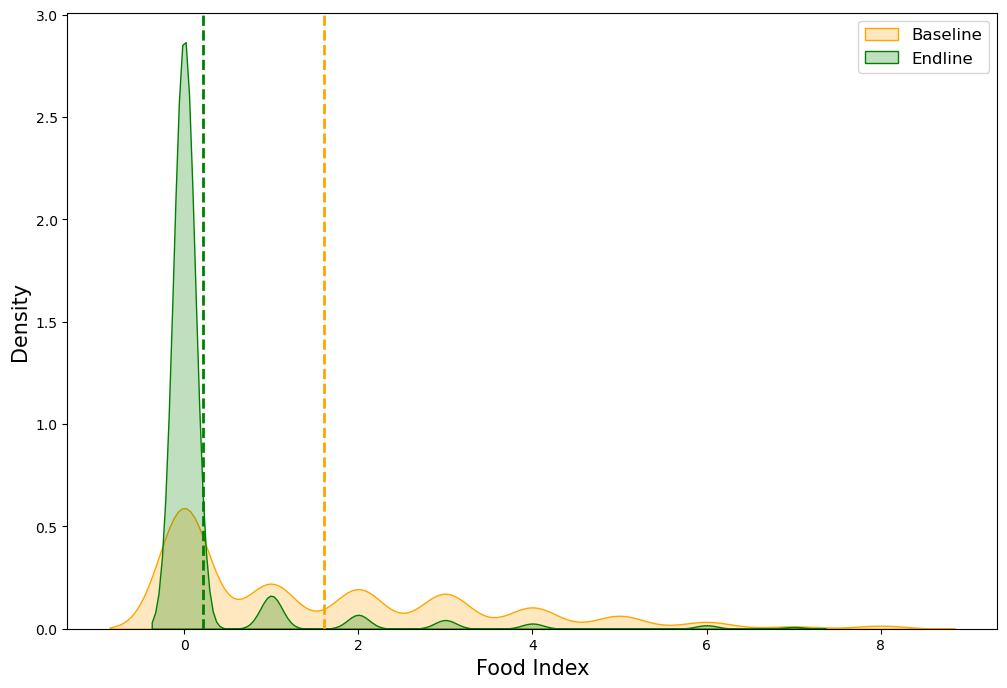

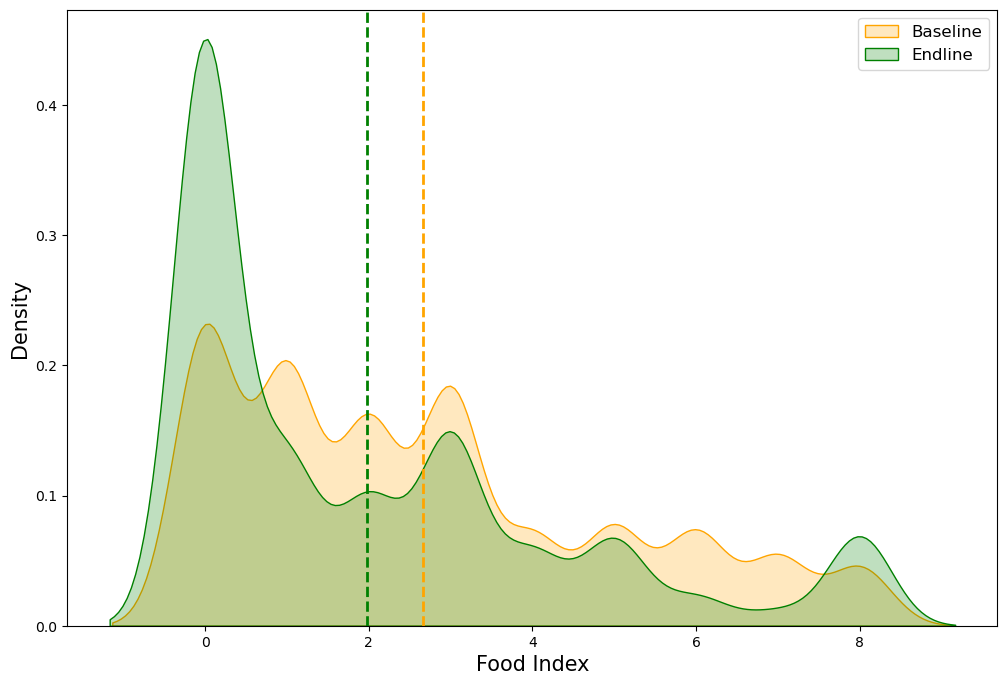

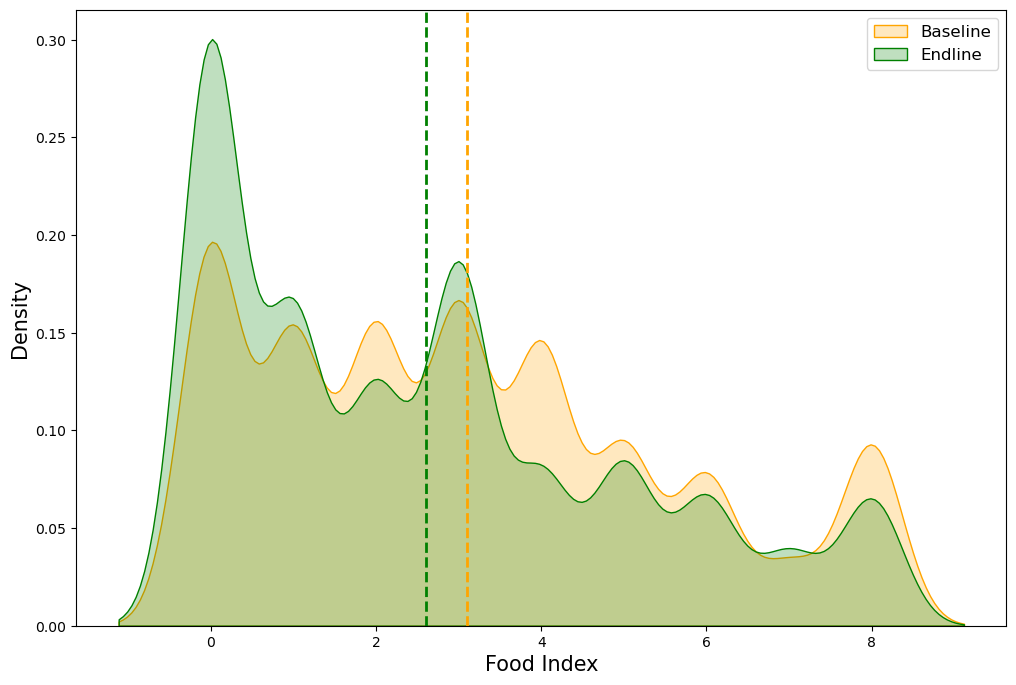

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# List of states to create separate plots
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']

# Create a dictionary to map state names to abbreviations
state_abbr = {
    'Gujarat': 'GJ',
    'Madhya Pradesh': 'MP',
    'Uttar Pradesh': 'UP'
}

for state in states_of_interest:
    state_df = df[df['state'] == state]
    
    # Set up the figure and axes
    plt.figure(figsize=(12, 8), facecolor='white')
    
    # Plot the density for baseline food index
    sns.kdeplot(state_df['fies_raw'], shade=True, color='orange', label='Baseline', bw_adjust=0.5)
    
    # Plot the density for endline food index
    sns.kdeplot(state_df['fies_raw_el'], shade=True, color='green', label='Endline', bw_adjust=0.5)
    
    # Customize the plot
    #plt.title(f'Density Plot of Baseline and Endline Food Indices in {state}', fontsize=20)
    plt.xlabel('Food Index', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.legend(fontsize=12, title_fontsize=15)
    plt.grid(False)  # Remove grid lines
    plt.axvline(state_df['fies_raw'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Baseline Mean')
    plt.axvline(state_df['fies_raw_el'].mean(), color='green', linestyle='dashed', linewidth=2, label='Endline Mean')
    
    # Set the background color to white
    plt.gca().set_facecolor('white')
    
    # Save the figure
    plt.savefig(f'food_index_{state_abbr[state]}.png')
    
    # Show the plot
    plt.show()


In [15]:
from IPython.display import FileLink

# Display download links for the saved images
display(FileLink('food_index_GJ.png'))
display(FileLink('food_index_MP.png'))
display(FileLink('food_index_UP.png'))


/Users/la/food_index_GJ.png

/Users/la/food_index_MP.png

/Users/la/food_index_UP.png

## Combined Density Plot for Food Indices

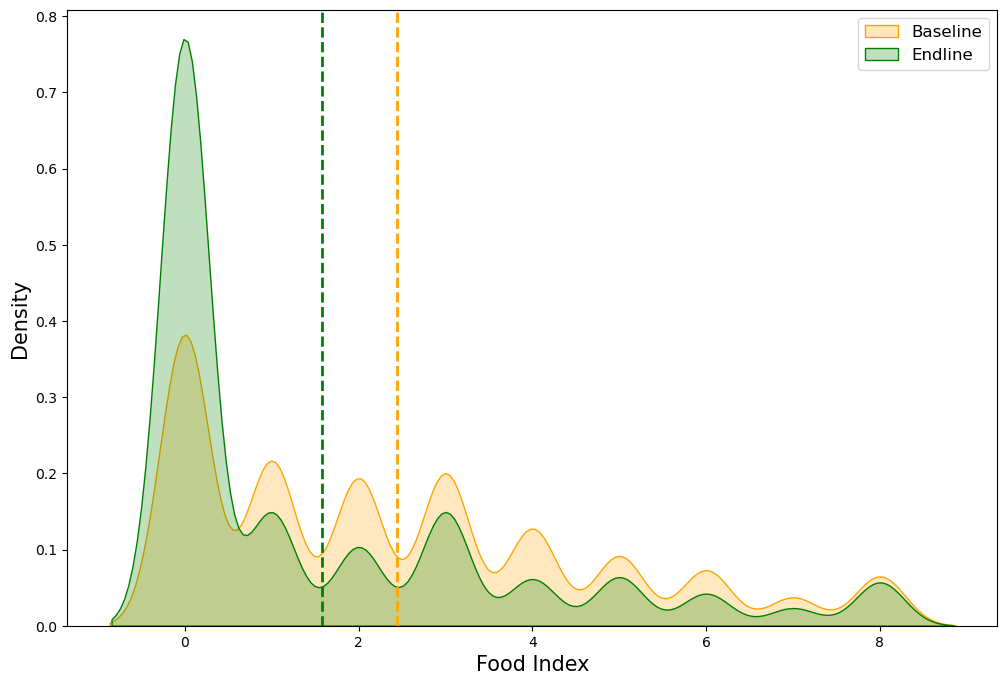

In [16]:
# Set up the figure and axes
plt.figure(figsize=(12, 8), facecolor='white')

# Plot the density for baseline wealth index
sns.kdeplot(df['fies_raw'], shade=True, color='orange', label='Baseline', bw_adjust=0.5)

# Plot the density for endline wealth index
sns.kdeplot(df['fies_raw_el'], shade=True, color='green', label='Endline', bw_adjust=0.5)

# Customize the plot
#plt.title('Density Plot of Baseline and Endline Food Indices', fontsize=20)
plt.xlabel('Food Index', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend( fontsize=12, title_fontsize=15)
plt.grid(False)  # Remove grid lines
plt.axvline(df['fies_raw'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Baseline Mean')
plt.axvline(df['fies_raw_el'].mean(), color='green', linestyle='dashed', linewidth=2, label='Endline Mean')

# Set the background color to white
plt.gca().set_facecolor('white')

# Save the figure
plt.savefig('Food_index_comb.png')

plt.show()

# 3. COPING STRATEGIES INDEX

In [17]:
lCSI_columns = any(col.startswith('lCSI') for col in df.columns)
lCSI_columns = [col for col in df.columns if col.startswith('lCSI')]

print(lCSI_columns)



['lCSI', 'lCSI_el']


## Baseline lCSI 

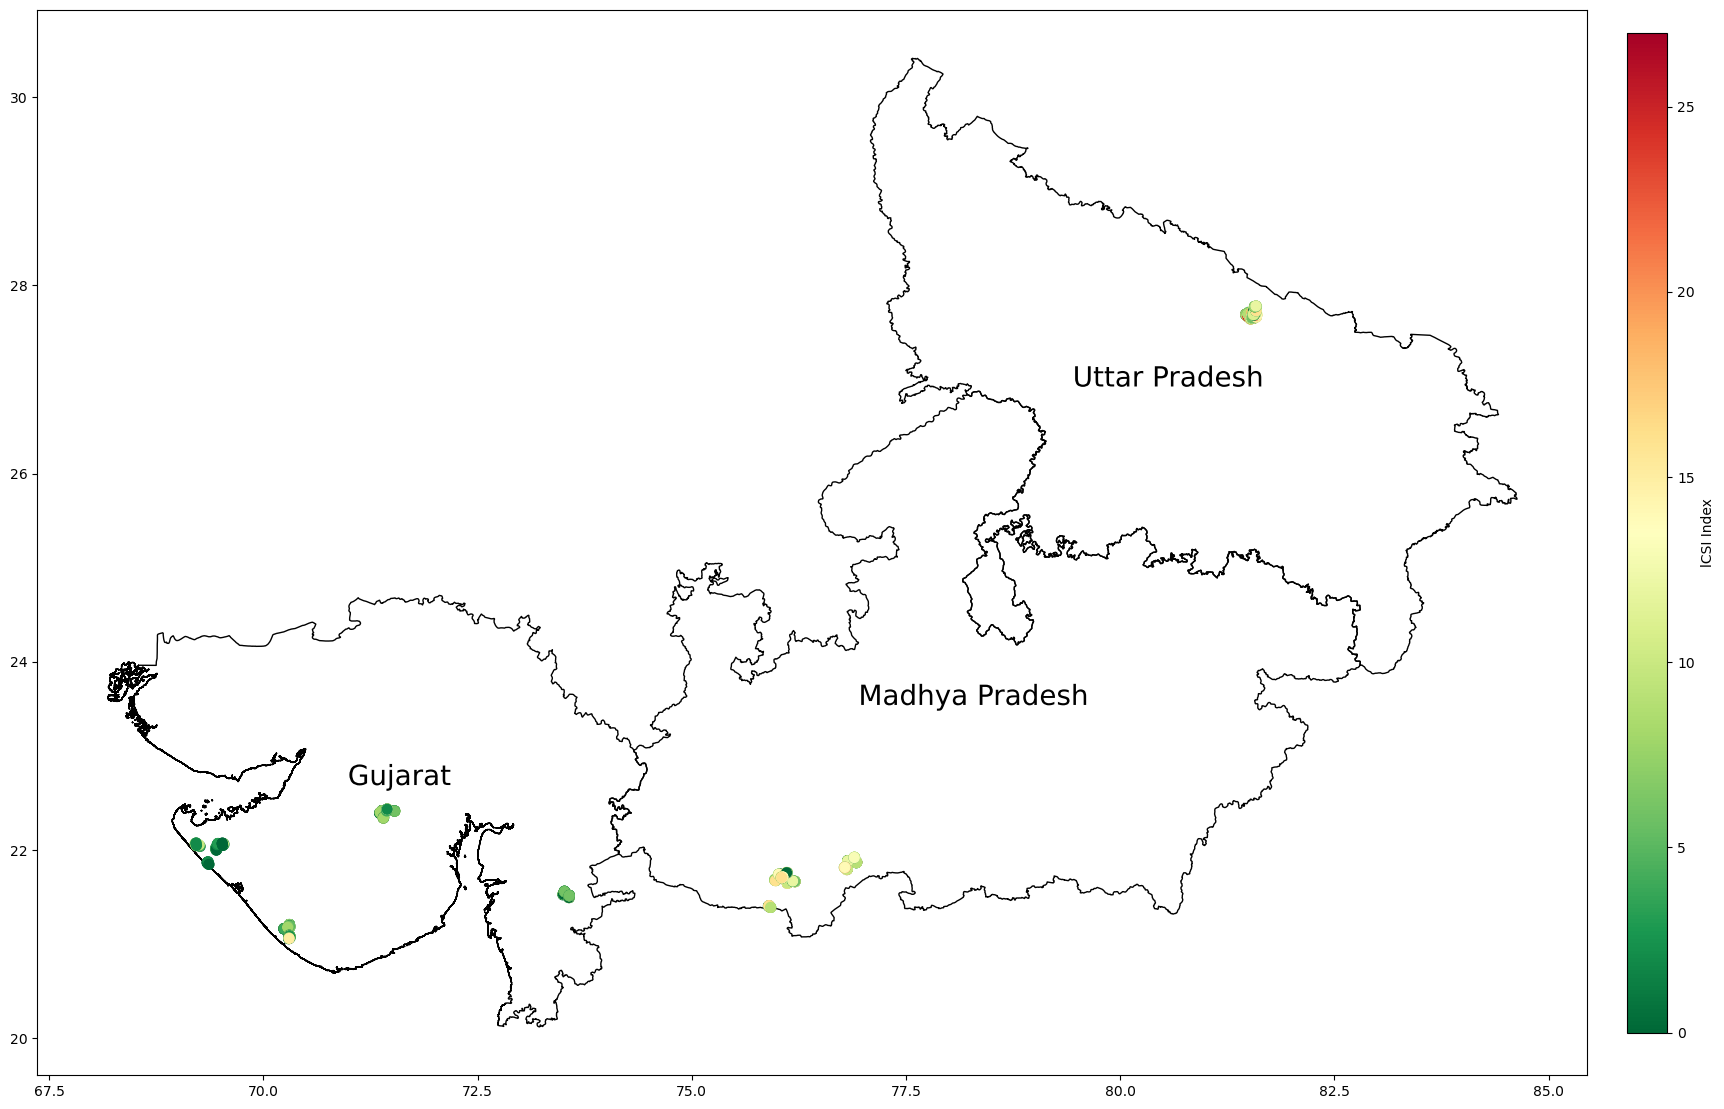

In [18]:
# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='lCSI', cmap='RdYlGn_r', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=filtered_geo_df['lCSI'].min(), vmax=filtered_geo_df['lCSI'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('lCSI Index')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=20, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Baseline lCSI Index Distribution in Gujarat, Madhya Pradesh, Uttar Pradesh', fontsize=30)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white

# Save the figure
plt.savefig('lCSI_index_bl.png')

plt.show()


## Endline lCSI

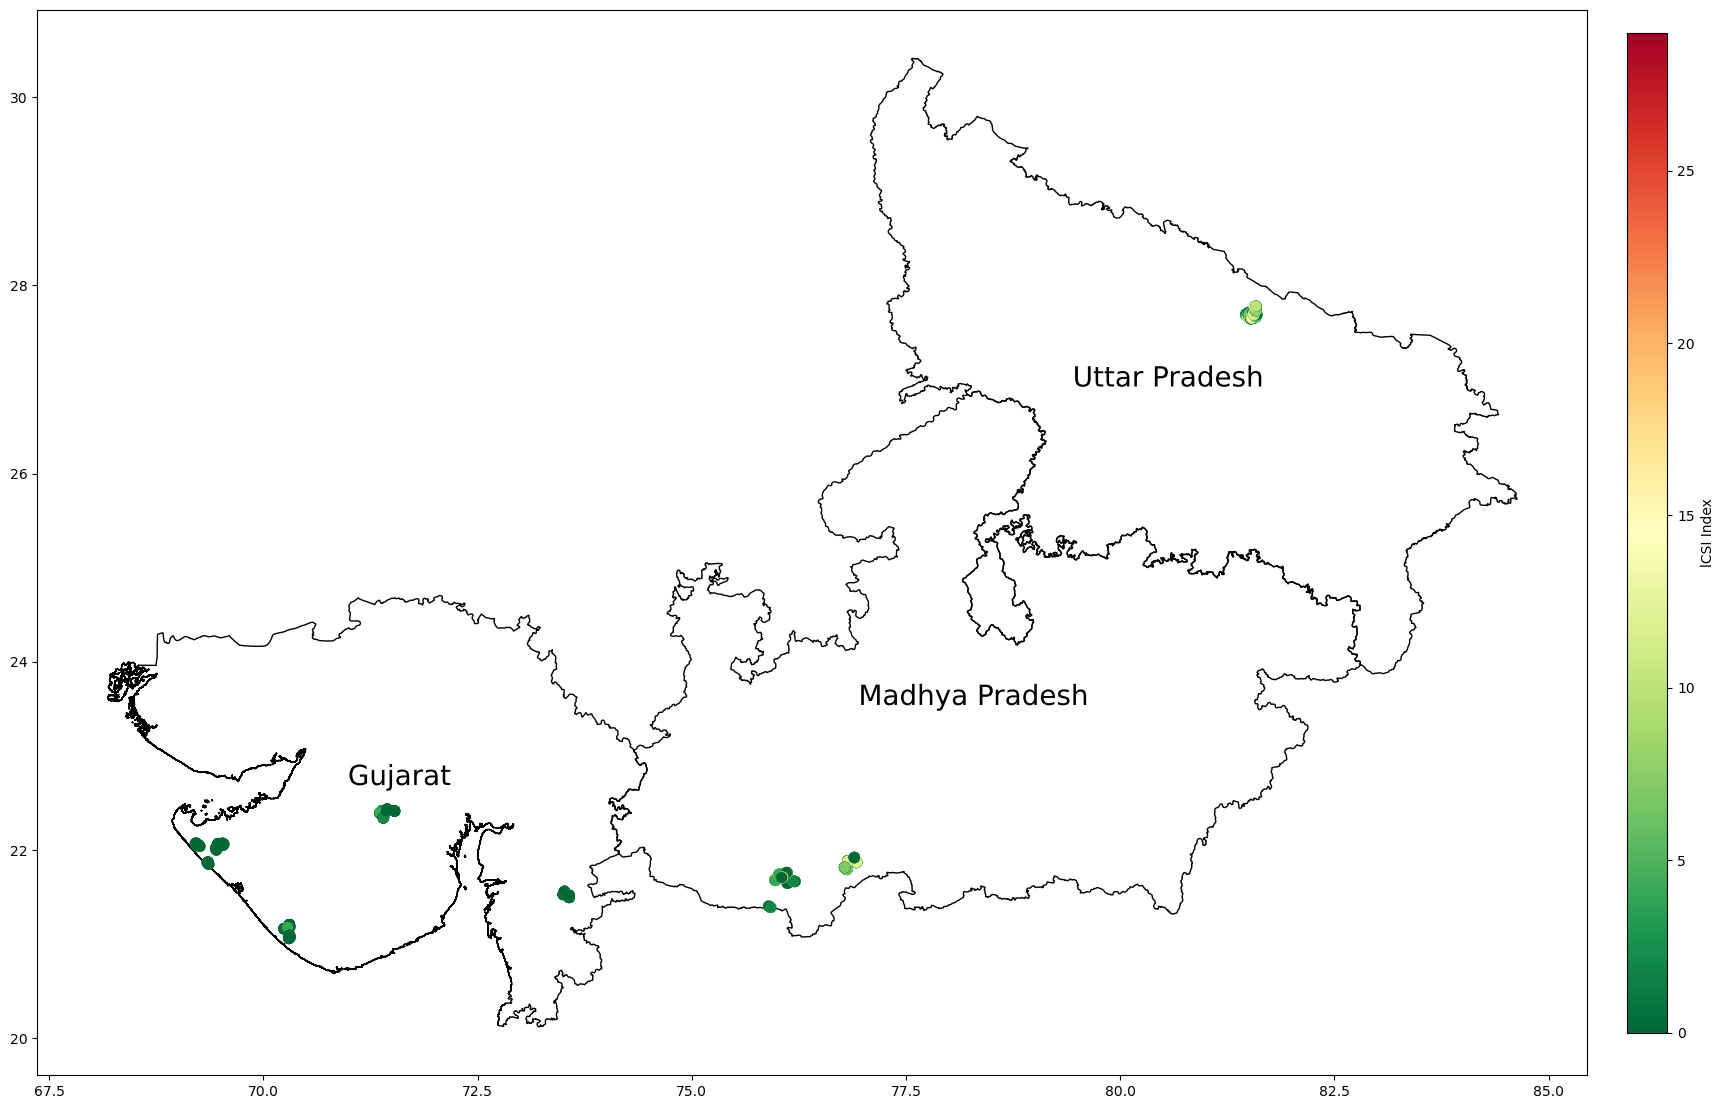

In [19]:
# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='lCSI_el', cmap='RdYlGn_r', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=filtered_geo_df['lCSI_el'].min(), vmax=filtered_geo_df['lCSI_el'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('lCSI Index')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=20, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('Endline lCSI Index Distribution in Gujarat, Madhya Pradesh, Uttar Pradesh', fontsize=30)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white


# Save the figure
plt.savefig('lCSI_index_el.png')

plt.show()

## lCSI Difference between Endline and Baseline

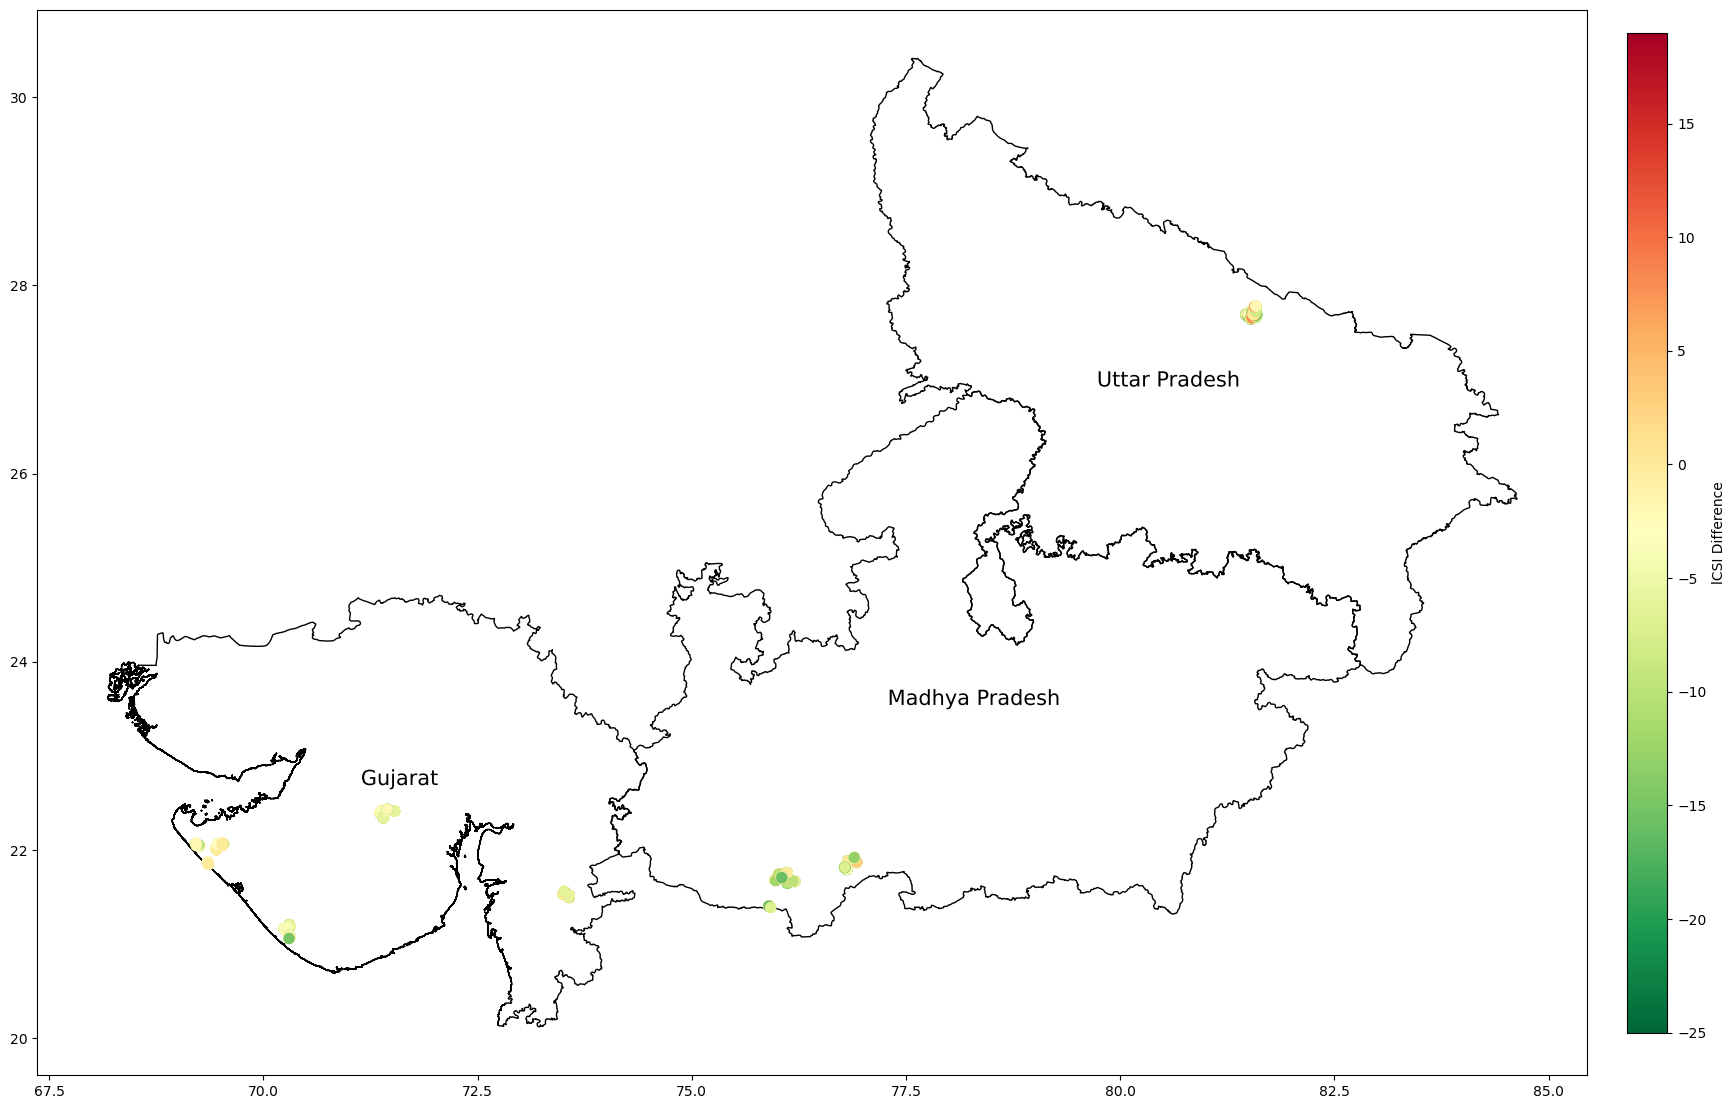

In [20]:

# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# Path to the shapefile directory
shapefile_dir = '/Users/la/Downloads/gadm41_IND_shp/gadm41_IND_shp'

# Calculate the difference between 'wealth_index_el' and 'wealth_index'
df['lCSI_diff'] = df['lCSI_el'] - df['lCSI']

# Assuming the shapefile is named 'gadm41_IND_1.shp' (adjust if the name is different)
shapefile_path = os.path.join(shapefile_dir, 'gadm41_IND_1.shp')

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Filter for the specific states
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']
filtered_gdf = gdf[gdf['NAME_1'].isin(states_of_interest)]

# Convert df to a GeoDataFrame for households
geometry = [Point(xy) for xy in zip(df['lon_el'], df['lat_el'])]
geo_df = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Filter households for the specific states in the original dataset
filtered_geo_df = geo_df[geo_df['state'].isin(states_of_interest)]

# Plot the filtered states
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')  # Increased figure size, white background
filtered_gdf.plot(ax=ax, color='none', edgecolor='black')  # Plot states without filling color

# Plot wealth_index_diff with a red to green color scale and larger markers
filtered_geo_df.plot(ax=ax, column='lCSI_diff', cmap='RdYlGn_r', markersize=50)

# Customize the colorbar legend
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Position of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=filtered_geo_df['lCSI_diff'].min(), vmax=filtered_geo_df['lCSI_diff'].max()))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('lCSI Difference')

# Add state labels for highlighted states
for x, y, label in zip(filtered_gdf.geometry.centroid.x, filtered_gdf.geometry.centroid.y, filtered_gdf['NAME_1']):
    ax.text(x, y, label, fontsize=15, ha='center', color='black', 
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")])

# Customize the plot
#ax.set_title('lCSI Index Difference in Gujarat, Madhya Pradesh, and Uttar Pradesh', fontsize=20)
#ax.set_xlabel('Longitude', fontsize=12)
#ax.set_ylabel('Latitude', fontsize=12)
ax.grid(False)  # Remove grid lines
ax.set_facecolor('white')  # Set the background color to white


# Save the figure
plt.savefig('lCSI_index_diff_el&bl.png')

plt.show()

## lCSI DENSITY PLOT FOR THE 3 STATES

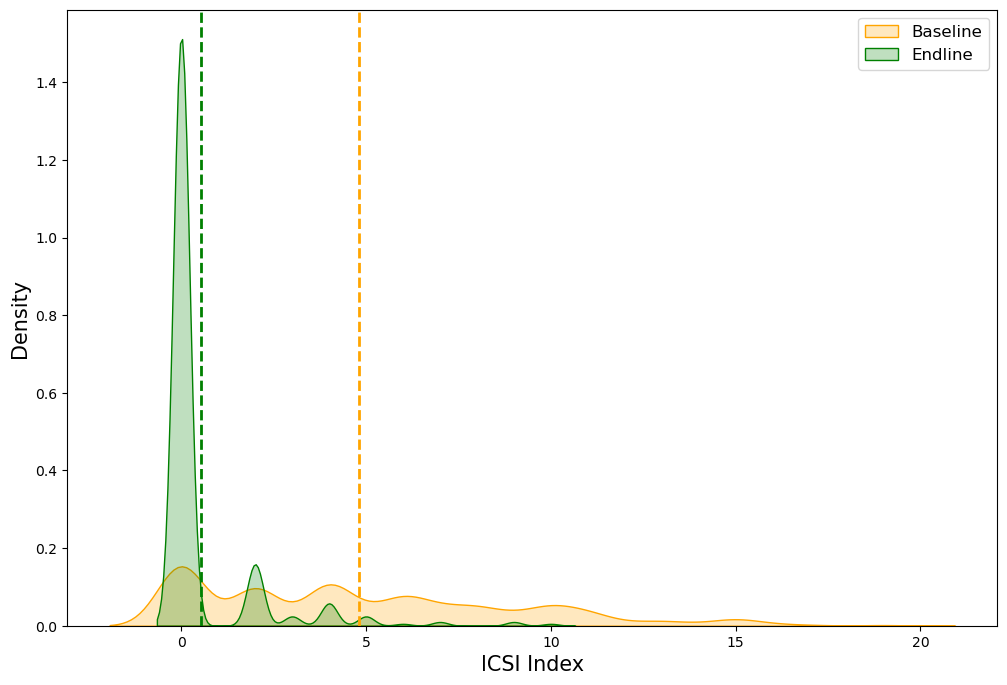

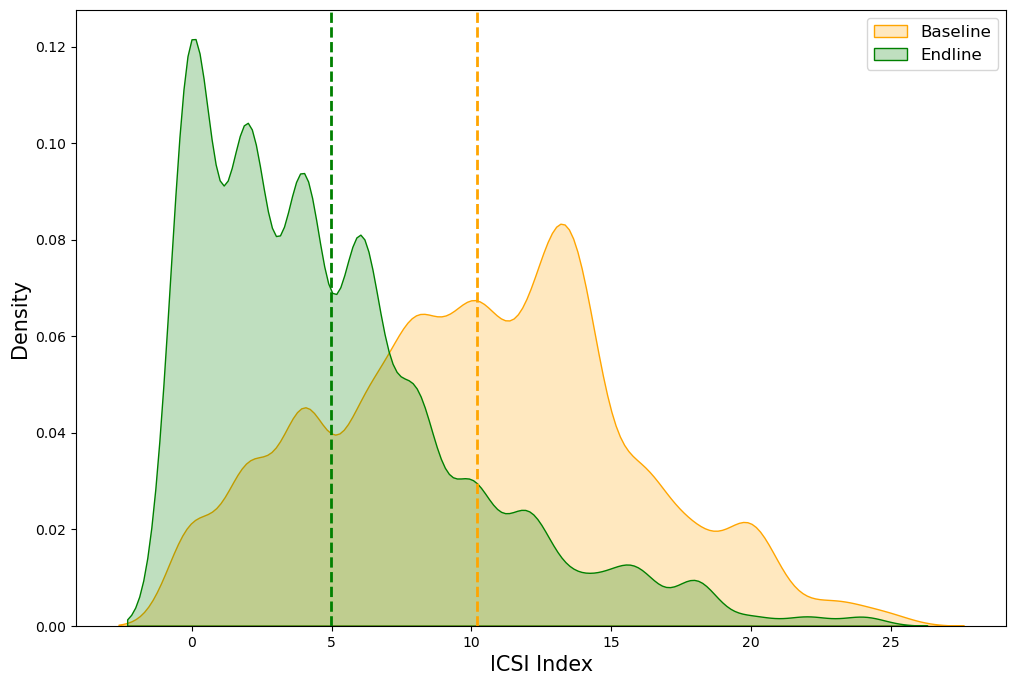

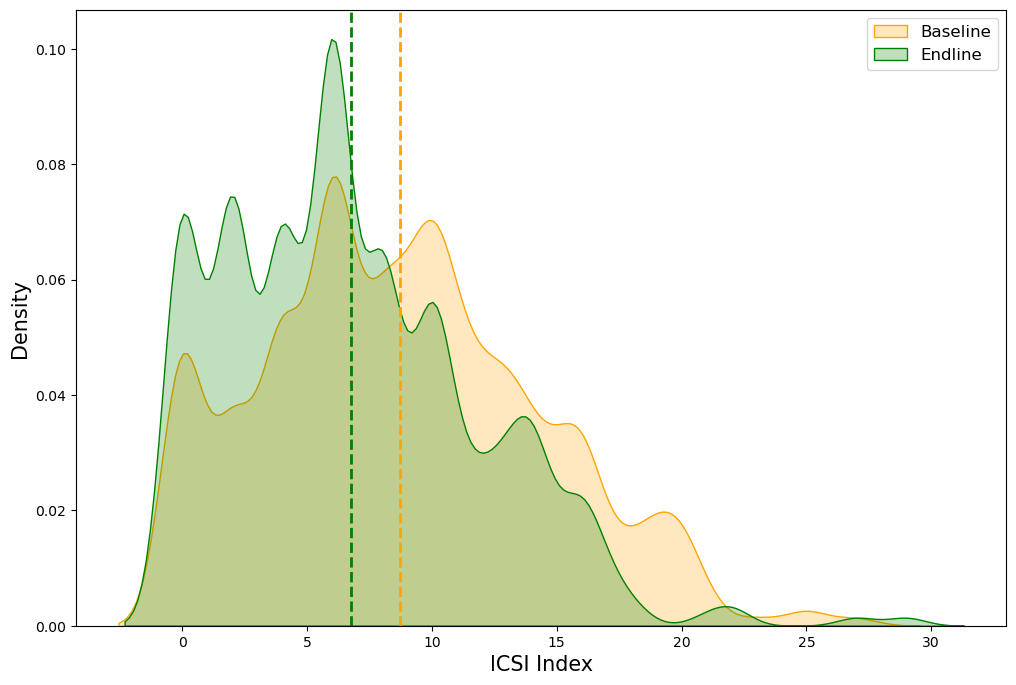

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the baseline dataset
df = pd.read_csv('/Users/la/Downloads/LCA_Baseline_Endline_Final.csv')

# List of states to create separate plots
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']

# Create a dictionary to map state names to abbreviations
state_abbr = {
    'Gujarat': 'GJ',
    'Madhya Pradesh': 'MP',
    'Uttar Pradesh': 'UP'
}

for state in states_of_interest:
    state_df = df[df['state'] == state]
    
    # Set up the figure and axes
    plt.figure(figsize=(12, 8), facecolor='white')
    
    # Plot the density for baseline lCSI index
    sns.kdeplot(state_df['lCSI'], shade=True, color='orange', label='Baseline', bw_adjust=0.5)
    
    # Plot the density for endline lCSI index
    sns.kdeplot(state_df['lCSI_el'], shade=True, color='green', label='Endline', bw_adjust=0.5)
    
    # Customize the plot
    #plt.title(f'Density Plot of Baseline and Endline lCSI Indices in {state}', fontsize=20)
    plt.xlabel('lCSI Index', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.legend(fontsize=12, title_fontsize=15)
    plt.grid(False)  # Remove grid lines
    plt.axvline(state_df['lCSI'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Baseline Mean')
    plt.axvline(state_df['lCSI_el'].mean(), color='green', linestyle='dashed', linewidth=2, label='Endline Mean')
    
    # Set the background color to white
    plt.gca().set_facecolor('white')
    
    # Save the figure
    plt.savefig(f'lCSI_index_{state_abbr[state]}.png')
    
    # Show the plot
    plt.show()


In [22]:
from IPython.display import FileLink

# Display download links for the saved images
display(FileLink('lCSI_index_GJ.png'))
display(FileLink('lCSI_index_MP.png'))
display(FileLink('lCSI_index_UP.png'))


/Users/la/lCSI_index_GJ.png

/Users/la/lCSI_index_MP.png

/Users/la/lCSI_index_UP.png

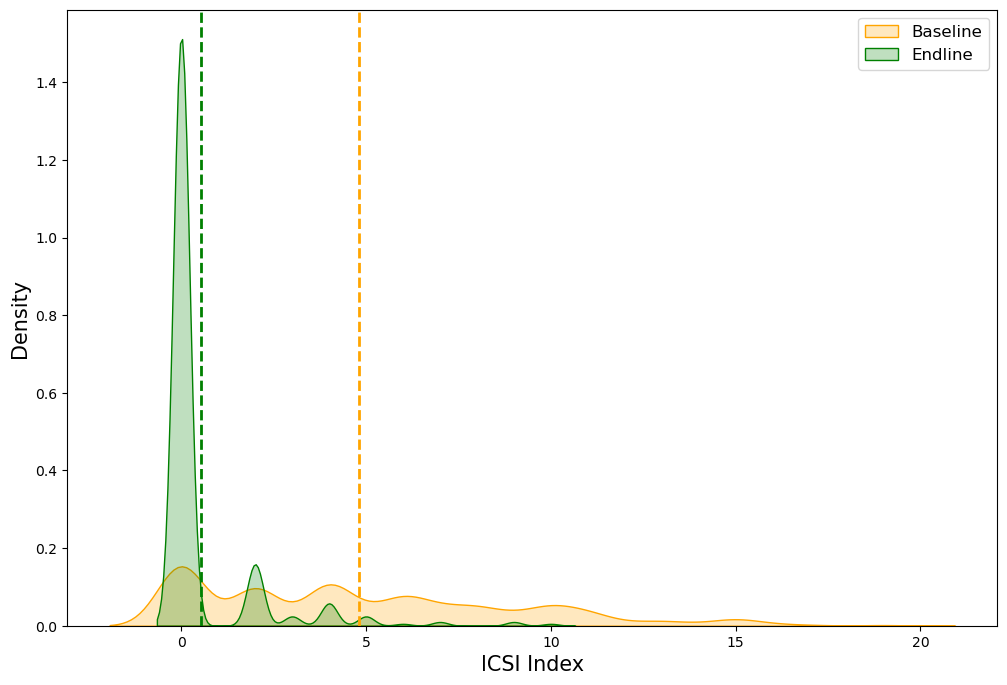

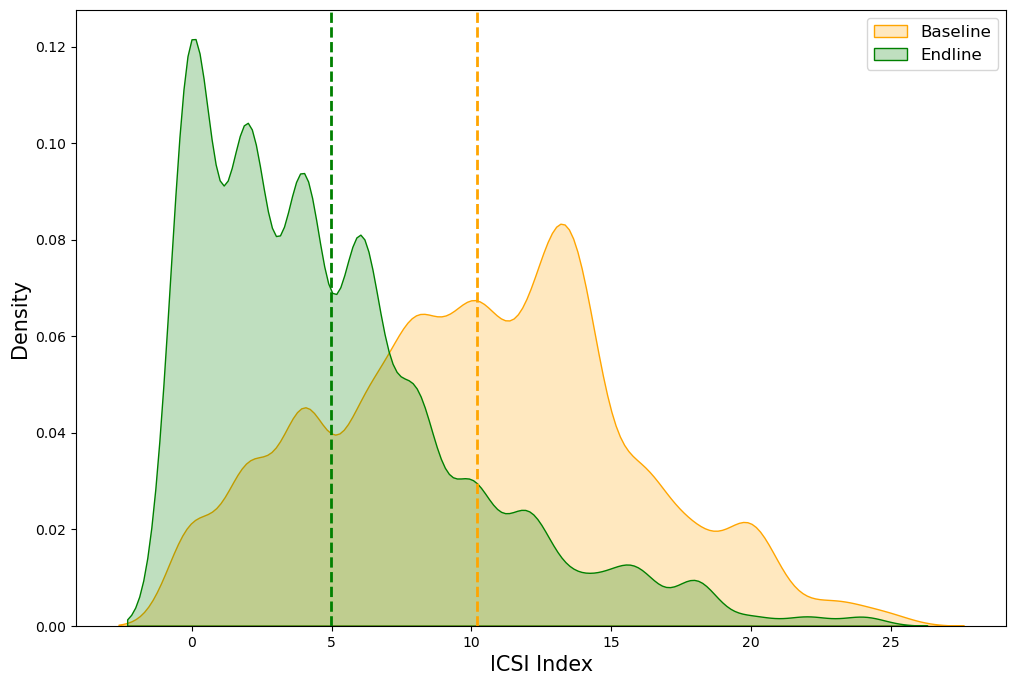

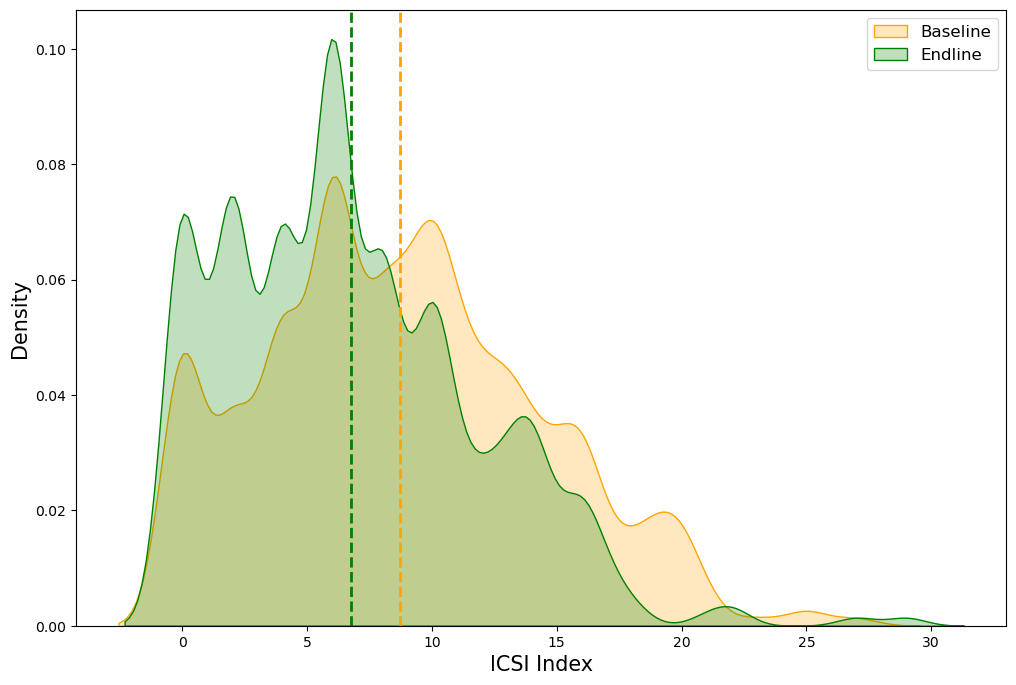

In [23]:
# List of states to create separate plots
states_of_interest = ['Gujarat', 'Madhya Pradesh', 'Uttar Pradesh']

for state in states_of_interest:
    state_df = df[df['state'] == state]
    
    # Set up the figure and axes
    plt.figure(figsize=(12, 8), facecolor='white')
    
    # Plot the density for baseline wealth index
    sns.kdeplot(state_df['lCSI'], shade=True, color='orange', label='Baseline', bw_adjust=0.5)
    
    # Plot the density for endline wealth index
    sns.kdeplot(state_df['lCSI_el'], shade=True, color='green', label='Endline', bw_adjust=0.5)
    
    # Customize the plot
    #plt.title(f'Density Plot of Baseline and Endline Food Indices in {state}', fontsize=20)
    plt.xlabel('lCSI Index', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.legend( fontsize=12, title_fontsize=15)
    plt.grid(False)  # Remove grid lines
    plt.axvline(state_df['lCSI'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Baseline Mean')
    plt.axvline(state_df['lCSI_el'].mean(), color='green', linestyle='dashed', linewidth=2, label='Endline Mean')
    
    # Set the background color to white
    plt.gca().set_facecolor('white')
    
    # Show the plot
    plt.show()

## Combined Density Plot

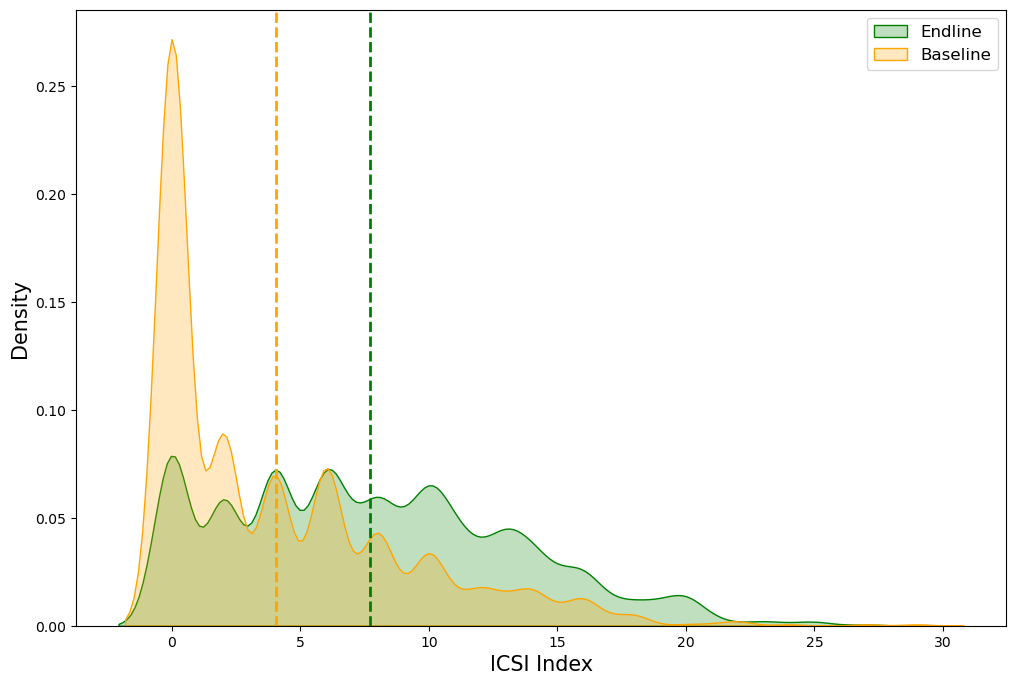

In [24]:
# Set up the figure and axes
plt.figure(figsize=(12, 8), facecolor='white')

# Plot the density for baseline wealth index
sns.kdeplot(df['lCSI'], shade=True, color='green', label='Endline', bw_adjust=0.5)

# Plot the density for endline wealth index
sns.kdeplot(df['lCSI_el'], shade=True, color='orange', label='Baseline', bw_adjust=0.5)

# Customize the plot
#plt.title('Density Plot of Baseline and Endline Food Indices', fontsize=20)
plt.xlabel('lCSI Index', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend( fontsize=12, title_fontsize=15)
plt.grid(False)  # Remove grid lines
plt.axvline(df['lCSI'].mean(), color='green', linestyle='dashed', linewidth=2, label='Baseline Mean')
plt.axvline(df['lCSI_el'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Endline Mean')

# Set the background color to white
plt.gca().set_facecolor('white')


# Save the figure
plt.savefig('lCSI_index_comb.png')

plt.show()